In [1]:
import pandas as pd 
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from matplotlib import style
import tueplots.constants.color.rgb as rgb
from tueplots import bundles


from scipy.stats import linregress
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

plt.rcParams.update(bundles.neurips2021(usetex=False))

In [2]:
data = pd.read_csv('../Data-literacy-project-main/source-data-updated/output_excess-death_poilical-status_hdi.csv')
df = data.drop(['Unnamed: 0'], axis=1)
df = df.replace({'F': 1, 'PF' : 2, 'NF': 3})
print(df)

                country  year  covid_deaths_per_100k  excess_deaths_per_100k  \
0               Albania  2020              41.107801              206.781044   
1               Andorra  2020             108.591669              105.566617   
2   Antigua and Barbuda  2020               5.064419              -54.378239   
3             Argentina  2020              94.823418               91.739185   
4               Armenia  2020              95.110453              332.067863   
..                  ...   ...                    ...                     ...   
84               Turkey  2020              67.274440              104.379470   
85              Ukraine  2020              44.357970               96.807899   
86        United States  2020             110.091197              159.181026   
87              Uruguay  2020               5.193461              -65.092051   
88           Uzbekistan  2020               1.809301               52.191439   

    PR  CL  Status  HDI_2019  
0    3  

In [3]:
difference = df['excess_deaths_per_100k'].values - df['covid_deaths_per_100k'].values
df["difference"] = difference

In [8]:
y = np.array(df.difference)
x = np.array(df.Status)

# scipy linear regression
slope, intercept, r_value, p_value, std_err = linregress(x, y)
y_pred = intercept + slope * x
print(linregress(x, y))


LinregressResult(slope=38.42965627438121, intercept=-29.48945755056192, rvalue=0.41548960386370937, pvalue=5.1448590306981735e-05, stderr=9.019784761155623, intercept_stderr=15.797286489560047)


In [4]:
hdi_excess_death = df[["country","excess_deaths_per_100k","Status","HDI_2019"]]
hdi_difference = df[["country","difference","Status","HDI_2019"]]

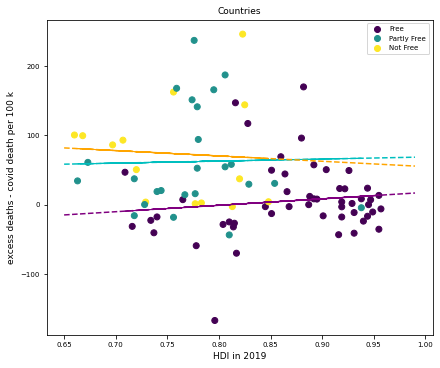

In [5]:
classes = ["Free","Partly Free","Not Free"]
colors = ["purple", "c","orange"]
fig, axes = plt.subplots(1, figsize = (6,5))
scatter = plt.scatter(x = df.HDI_2019, y = df.difference, c = df.Status)
plt.legend(handles=scatter.legend_elements()[0], labels=classes)
axes.set_ylabel("excess deaths - covid death per 100 k")
axes.set_xlabel("HDI in 2019")
axes.set_title("Countries")
for i in range(1,4):
    data = pd.DataFrame()
    data = (hdi_difference
            .groupby(["Status"])
            .get_group(i))
    fit = np.polyfit(data.HDI_2019, data.difference,1)
    x = data.HDI_2019
    yfitted = fit[0] * data.HDI_2019 + fit[1]
    x_ex = np.arange(0.65,1,0.02)
    y_ex = fit[0] * x_ex  + fit[1]
    plt.plot(x,yfitted,color=colors[i-1], linewidth=1)
    plt.plot(x_ex , y_ex, color=colors[i-1], linestyle='--')
plt.savefig('../Data-literacy-project-main/Plots/figname_allstatus.pdf',bbox_inches='tight')


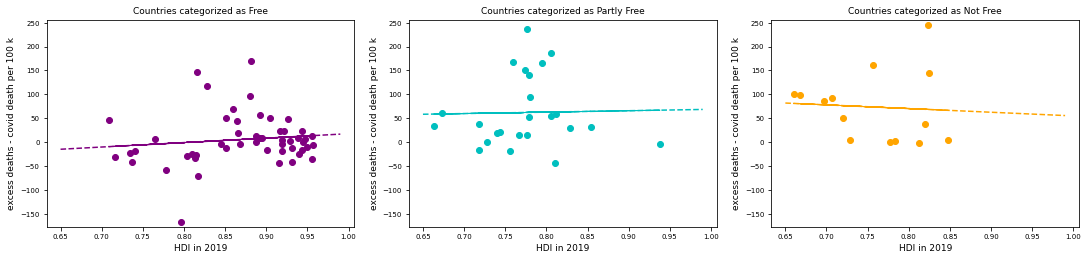

In [37]:
fig, axes = plt.subplots(1,3, figsize = (15,3.5))
for i in range(1,4):
    data = pd.DataFrame()
    data = (hdi_difference
            .groupby(["Status"])
            .get_group(i))
    axes[i-1].scatter(data.HDI_2019, data.difference,color=colors[i-1])
    fit = np.polyfit(data.HDI_2019, data.difference,1)
    x = data.HDI_2019
    yfitted = fit[0] * data.HDI_2019 + fit[1]
    x_ex = np.arange(0.65,1,0.02)
    y_ex = fit[0] * x_ex  + fit[1]
    
    axes[i-1].plot(x,yfitted,color=colors[i-1], linewidth=1)
    axes[i-1].plot(x_ex , y_ex, color=colors[i-1], linestyle='--')
    axes[i-1].set_ylim(np.min(df.difference)-10,np.max(df.difference)+10)
    axes[i-1].set_ylabel("excess deaths - covid death per 100 k")
    axes[i-1].set_xlabel("HDI in 2019")
    axes[i-1].set_title("Countries categorized as %s" %classes[i-1])
plt.savefig('../Data-literacy-project-main/Plots/figname_neurips.pdf',bbox_inches='tight')


In [36]:
data = (hdi_difference
            .groupby(["Status"])
            .get_group(2))
max_value = np.max(data.HDI_2019)
max_index = data.HDI_2019.index(max_value)
#print(data)

TypeError: 'Int64Index' object is not callable